In [1]:
import numpy as np
from typing import *
from GaussNewton_line import *
from Levenberg_Marquardt_yq import *
from cookbook import *
import numpy.typing as npt

In [2]:
def rJ(x: Union[list, np.ndarray]):
    r = np.array([x[0], (10*x[0]) / (x[0] + 0.1) + 2*x[1]**2])
    J = np.array([[1, 0],[10/(x[0] + 0.1) - (10*x[0]) / ((x[0]+0.1)**2), 4*x[1]]])
    
    return r, J

# 5

## 5 a)

The Gauss-Newton iteration step is 
$$
\bold x_{k+1} = \bold x_k-(J(\bold x_k)^TJ(\bold x_k))^{-1}J(\bold x_k)^T\bold r(\bold x_k)
$$

Since the Jacobian is a square, non-singular matrix, we can distribute the inverse
$$
\bold x_{k+1} = \bold x_k-J(\bold x_k)^{-1}(J(\bold x_k)^T)^{-1}J(\bold x_k)^T\bold r(\bold x_k)
$$

The inverse of the transpose and the transpose cancel out leaving us with the Newton step
$$
\bold x_{k+1} = \bold x_k-J(\bold x_k)^{-1}\bold r(\bold x_k)
$$


## 5 b)

We can still use Gauss-Newton if it's not square as we are using the pseudo-inverse which work for non-square matrices.

## 5 c)

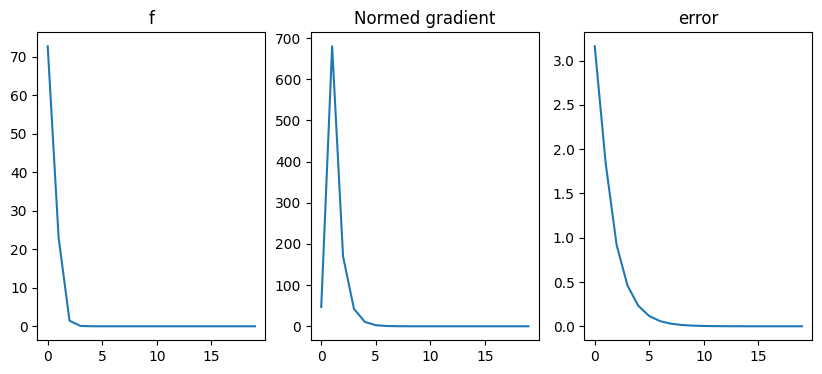

In [3]:
x0 = np.array([3, 1])
x_star = np.array([0, 0])
x, stats = GaussNewton_line_md(rJ, x0, 0)
errors = get_errors(stats["X"], x_star)
plot_opt_stats(stats, errors)


# 7

## 7 a)

$$J = \begin{bmatrix}
1 & 0\\
\frac{10}{z_1+0.1}-\frac{10z_1}{(z_1+0.1)^2} & 2
\end{bmatrix}

This Jacobian is non-singular since the determinant is 2 for every **z**. 

## 7 b)

In [4]:
def rJ(z: npt.NDArray) -> (npt.NDArray, npt.NDArray):
    r = np.array([z[0], 10*z[0] / (z[0] + 0.1) + 2*z[1]])
    J = np.array([[1, 0], [10/(z[0]+0.1) - 10*z[0]/(z[0] + 0.1)**2, 2]])
    return r, J

z0 = np.array([3, 1])
_, J0 = rJ(z0)
tau = 10e-16
z, stats = Levenberg_Marquardt_yq(rJ, z0, tau)

In [5]:
stats

{'converged': True,
 'iter': 2,
 'X': array([[ 3.00000000e+00,  1.00000000e+00],
        [ 1.19904087e-14, -4.68262227e+00],
        [ 9.78369029e-13, -4.89235319e-11]]),
 'F': array([7.26810614e+01, 4.38539026e+01, 4.78654600e-25]),
 'dF': array([[ 4.21513209e+00,  2.33548387e+01],
        [-9.36524454e+02, -1.87304891e+01],
        [-3.77153470e-14, -2.03216875e-14]]),
 'nfun': 3}

# Rosenbrock problem

In [10]:
def rJ_Rosen(x: npt.NDArray) -> tuple[npt.NDArray, npt.NDArray]:
    r = np.sqrt(2) * np.array([10*(x[1] - x[0]**2), 1 - x[0]])
    J = np.array([[-20*x[0], 10], [-1, 0]])
    return r, J

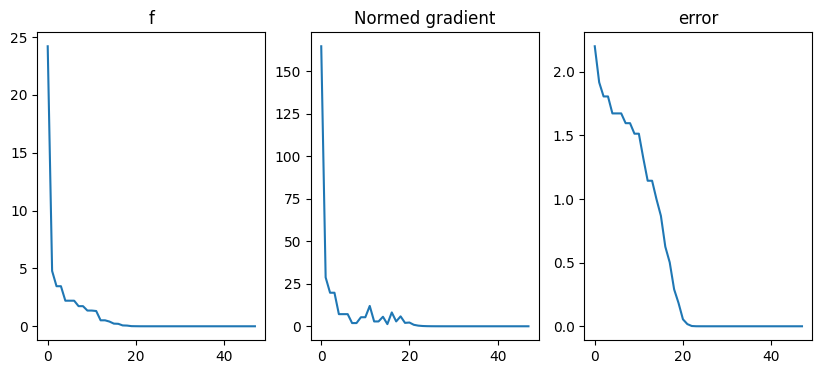

In [12]:
x0 = np.array([-1.2, 1])
x_star = np.array([1, 1])
tau = 10e-3
x, stats = Levenberg_Marquardt_yq(rJ_Rosen, x0, tau)
errors = get_errors(stats["X"], x_star)
plot_opt_stats(stats, errors)

In [13]:
stats

{'converged': True,
 'iter': 47,
 'X': array([[-1.2       ,  1.        ],
        [-0.91595302,  0.94431057],
        [-0.7182687 ,  0.44447448],
        [-0.7182687 ,  0.44447448],
        [-0.45822025,  0.18088538],
        [-0.45822025,  0.18088538],
        [-0.45822025,  0.18088538],
        [-0.31879612,  0.10143539],
        [-0.31879612,  0.10143539],
        [-0.11933163, -0.01823698],
        [-0.11933163, -0.01823698],
        [ 0.19044268, -0.0451554 ],
        [ 0.29442533,  0.10010949],
        [ 0.29442533,  0.10010949],
        [ 0.44795584,  0.16855152],
        [ 0.52194462,  0.27579694],
        [ 0.69821846,  0.45259149],
        [ 0.74628616,  0.56701102],
        [ 0.8721678 ,  0.73961187],
        [ 0.91280917,  0.83964256],
        [ 0.97824511,  0.94978241],
        [ 0.99125962,  0.98532434],
        [ 0.999573  ,  0.99793149],
        [ 0.99978554,  1.00007236],
        [ 1.00008416,  0.99996069],
        [ 0.99996543,  1.00001682],
        [ 1.00001428,  0.9

In [14]:
xs = stats["X"]

In [34]:
d = 1e-16
numerator_numerator = np.linalg.norm(xs[3:] - xs[2:-1], axis=1) + d
numerator_denominator = np.linalg.norm(xs[2:-1] - xs[1:-2], axis=1) + d

denominator_numerator = np.linalg.norm(xs[2:-1] - xs[1:-2], axis=1) + d
denominator_denominator = np.linalg.norm(xs[1:-2] - xs[0:-3], axis=1) + d

orders = np.log(numerator_numerator / numerator_denominator) / (np.log(denominator_numerator / denominator_denominator) + d)
orders

array([-5.85197645e+01, -9.89710393e-01, -1.00000000e+00, -0.00000000e+00,
        3.50117281e+17, -1.00000000e+00, -1.01060338e+00, -1.00000000e+00,
       -1.00820284e+00, -1.55354947e-02,  6.33687257e+01, -9.98266606e-01,
       -7.26660702e-03, -2.55271532e+00, -1.07479233e+00, -7.77023914e-01,
       -1.25643253e+00, -2.50649010e-01, -7.12879190e+00,  7.53590534e-01,
        2.12080714e+00,  9.79768512e-01,  4.64516627e-01,  9.94394445e-01,
        9.99618414e-01,  9.99957838e-01,  9.99931414e-01,  9.99973314e-01,
        9.99972812e-01,  9.99984192e-01,  9.99987257e-01,  9.99991494e-01,
        9.99993658e-01,  9.99995565e-01,  9.99996764e-01,  9.99997609e-01,
        9.99998311e-01,  9.99998552e-01,  9.99998803e-01,  9.99997799e-01,
        9.99989176e-01,  9.99999215e-01,  1.00000690e+00,  1.00003595e+00,
        1.00001535e+00])

In [38]:
len(orders)

45

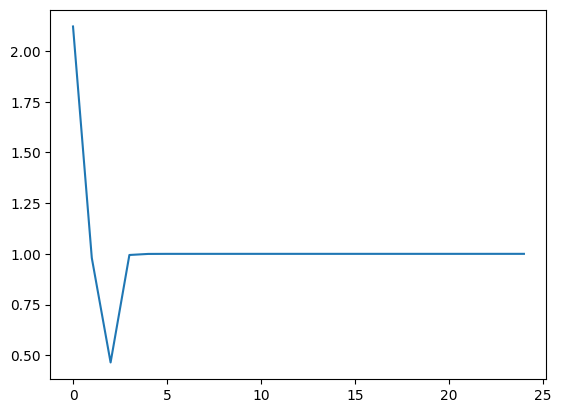

In [41]:
import matplotlib.pyplot as plt
plt.plot(orders[20:])

In [29]:
np.where(np.linalg.norm(numerator_numerator, axis=1)

array([0.00000000e+00, 3.70276127e-01, 0.00000000e+00, 0.00000000e+00,
       1.60472394e-01, 0.00000000e+00, 2.32610310e-01, 0.00000000e+00,
       3.10941679e-01, 1.78645676e-01, 0.00000000e+00, 1.68095001e-01,
       1.30291677e-01, 2.49657322e-01, 1.24106136e-01, 2.13628742e-01,
       1.07971574e-01, 1.28111858e-01, 3.78497837e-02, 1.51014162e-02,
       2.15138755e-03, 3.18817032e-04, 1.31333328e-04, 5.43710166e-05,
       2.25167709e-05, 9.32525910e-06, 3.86226406e-06, 1.59968044e-06,
       6.62574799e-07, 2.74436988e-07, 1.13672458e-07, 4.70837577e-08,
       1.95024605e-08, 8.07810312e-09, 3.34603603e-09, 1.38596652e-09,
       5.74084055e-10, 2.37792811e-10, 9.84968327e-11, 4.07986964e-11,
       1.68994889e-11, 7.00001585e-12, 2.89945716e-12, 1.20090374e-12,
       4.97351985e-13])

In [ ]:
a

In [17]:
xs[1:-2] - xs[0:-3]

array([[ 2.84046979e-01, -5.56894305e-02],
       [ 1.97684324e-01, -4.99836086e-01],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 2.60048446e-01, -2.63589104e-01],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.39424134e-01, -7.94499853e-02],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.99464484e-01, -1.19672371e-01],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 3.09774316e-01, -2.69184218e-02],
       [ 1.03982646e-01,  1.45264885e-01],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.53530511e-01,  6.84420316e-02],
       [ 7.39887841e-02,  1.07245424e-01],
       [ 1.76273843e-01,  1.76794544e-01],
       [ 4.80676925e-02,  1.14419535e-01],
       [ 1.25881639e-01,  1.72600846e-01],
       [ 4.06413748e-02,  1.00030692e-01],
       [ 6.54359402e-02,  1.10139847e-01],
       [ 1.30145082e-02,  3.55419288e-02],
       [ 8.31338369e-03,  1.26071576e-02],
       [ 2.12534560e-04,  2.14086372e-03],
       [ 2.

In [15]:
a = np.array([1, 2])
a[:-1]
np.max(a,)

array([1])